Estimate the bicarbonates of well water based on its pH value using simple regression model. Consider SGD optimizer. Dataset: Union Carbide Technical Report

 Write the python code to build simple linear regression model using SGD optimizer

 Do the data normalization

Split the data for train and test (90:10)

 Train the simple linear regression model using SGD with

training data

 Compute MSE, RMSE and MAE with training data Compute MSE, RMSE and MAE with testing data

In [1]:
import pandas as pd
data = pd.read_csv("C:\\Users\\saiteja\\Downloads\\ground.csv")

In [2]:
data.head(34)

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171
5,7.8,143
6,7.3,217
7,8.0,190
8,7.1,142
9,7.5,190


In [3]:
data.isnull().sum()

X    0
Y    0
dtype: int64

In [4]:
# Import libraries 
import matplotlib.pyplot as plt 
import numpy as np 

{'whiskers': [<matplotlib.lines.Line2D at 0x1ddc60c7088>,
 'caps': [<matplotlib.lines.Line2D at 0x1ddc68b0d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ddc6899988>,
 'medians': [<matplotlib.lines.Line2D at 0x1ddc68c1a08>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ddc68c5a08>,
 'means': []}

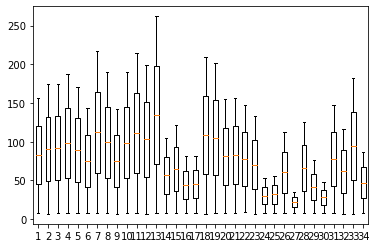

In [5]:
plt.boxplot(data)

In [7]:
data.skew()

X    0.351972
Y   -0.167721
dtype: float64

In [8]:
log_X=np.log(np.log(np.log(data['X'])))
log_X.skew()

0.07166044117329835

In [9]:
x_train=data.iloc[0:30,0]
y_train=data.iloc[0:30,0]
x_test=data.iloc[30:34,1]
y_test=data.iloc[30:35,1]
x_train=x_train.iloc[1:].values
x_train=x_train.reshape(len(x_train),1)
y_train=y_train.iloc[1:].values
y_train=y_train.reshape(len(y_train),1)
x_test=x_test.iloc[1:].values
x_test=x_test.reshape(len(x_test),1)
y_test=y_test.iloc[1:].values
y_test=y_test.reshape(len(y_test),1)
def slr_sgd(x,y,epochs):
    length=len(x)
    i=0
    j=0
    m=[1]*(length)
    c=[1]*(length)
    a1=[]
    a2=[]
    y_pre=[]
    while(j<epochs):
        while(i<length):
            k=(y[i]-(m[i]*x[i])-c[i])
            dm=-0.01*(k*x[i])
            dc=-0.01*k
            m[i]=m[i]+dm
            c[i]=c[i]+dc
            a1.append(m[i])
            a2.append(c[i])
            i=i+1
        j=j+1
    return a1,a2
m,c=slr_sgd(x_train,y_train,2)
print(m)
print(c)
i=0
y_pred=[]
while i<29:
    y_predict=(m[i]*x_train[i])-c[i]
    y_pred.append(y_predict)
    i=i+1
print(y_pred)

[array([1.071]), array([1.082]), array([1.075]), array([1.074]), array([1.078]), array([1.073]), array([1.08]), array([1.071]), array([1.075]), array([1.081]), array([1.07]), array([1.073]), array([1.078]), array([1.073]), array([1.08]), array([1.085]), array([1.071]), array([1.082]), array([1.079]), array([1.076]), array([1.088]), array([1.072]), array([1.079]), array([1.081]), array([1.077]), array([1.084]), array([1.074]), array([1.073]), array([1.085])]
[array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01]), array([1.01])]
[array([6.5941]), array([7.8624]), array([7.0525]), array([6.9376]), array([7.3984]), array([6.8229]),

In [10]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
def accuracy_op(y_train,y_pred):
    mse = math.sqrt(mean_squared_error(y_train,y_pred)) 
    print('Root mean square error:', mse) 
    mse = (mean_squared_error(y_train,y_pred)) 
    print('Mean square error:', mse) 
    mae=mean_absolute_error(y_train, y_pred)
    print('Mean absolute error:', mae)
print(accuracy_op(y_train,y_pred))

Root mean square error: 0.417941371899011
Mean square error: 0.1746749903448274
Mean absolute error: 0.4110344827586204
None


In [11]:
m1,c1=slr_sgd(x_test,y_test,2)
print(m1,c1)

i=0
yt_pred=[]
while i<3:
    yt_predict=(m1[i]*x_test[i])-c1[i]
    yt_pred.append(yt_predict)
    i=i+1
print(yt_pred)

[array([2.17]), array([2.82]), array([1.87])] [array([1.01]), array([1.01]), array([1.01])]
[array([252.88]), array([512.23]), array([161.68])]


In [12]:
print(accuracy_op(y_test,yt_pred))

Root mean square error: 210.62789440147762
Mean square error: 44364.1099
Mean absolute error: 180.26333333333332
None
